In [76]:
#Task 1

In [70]:
import pandas as pd
import numpy as np

In [62]:
data = pd.read_csv('/Users/gaotianyi/Desktop/coding test/eos.csv')
V = data['Volume (A^3/atom)'].values
E = data['Energy (eV/atom)'].values

In [64]:
V = np.array([17.94, 18.50, 19.07, 19.65, 20.25, 20.85, 21.47])
E = np.array([-2.591, -2.604, -2.610, -2.611, -2.606, -2.596, -2.582])

In [65]:
def energy_volume_equation(V, a, b, c, d):
    return a + b * V**(-2/3) + c * V**(-4/3) + d * V**(-2)

In [66]:
from scipy.optimize import curve_fit

In [67]:
params, _ = curve_fit(energy_volume_equation, V, E, p0 = [E.min(), 1, 1, 1])
#fitting parameters
a, b, c, d = params
print(f"a = {a:.14f}")
print(f"b = {b:.14f}")
print(f"c = {c:.14f}")
print(f"d = {d:.14f}")

a = 4.22224028943285
b = -97.86594972634504
c = 344.25357271515020
d = 44.18037623638358


In [45]:
params, _ = curve_fit(energy_volume_equation, V, E, p0 = [E.min(), 5, 5, 5])
#fitting parameters
a, b, c, d = params
print(f"a = {a:.14f}")
print(f"b = {b:.14f}")
print(f"c = {c:.14f}")
print(f"d = {d:.14f}")

a = 4.22196906482268
b = -97.86001539120419
c = 344.21033245900128
d = 44.28530058508080


In [36]:
params, _ = curve_fit(energy_volume_equation, V, E, p0 = [E.min(), 10, 10, 10])

In [108]:
#fitting parameters
a, b, c, d = params
print(f"a = {a:.13f}")
print(f"b = {b:.13f}")
print(f"c = {c:.13f}")
print(f"d = {d:.13f}")

a = 4.2224884444691
b = -97.8713623338698
c = 344.2928883194517
d = 44.0852720287048


In [68]:
#range
print(f":{V.min():.3f} - {V.max():.3f}A^3/atom")

:17.940 - 21.470A^3/atom


In [71]:
E_fitted = energy_volume_equation(V, a, b, c, d)

In [73]:
min_index = np.argmin(E_fitted)
V0 = V[min_index]
E0_min = E_fitted[min_index]
print(f"Equilibrium volume = {V0:.6f} A^3/atom")

Equilibrium volume = 19.650000 A^3/atom


In [77]:
#Task 2

In [81]:
import matplotlib.pyplot as plt

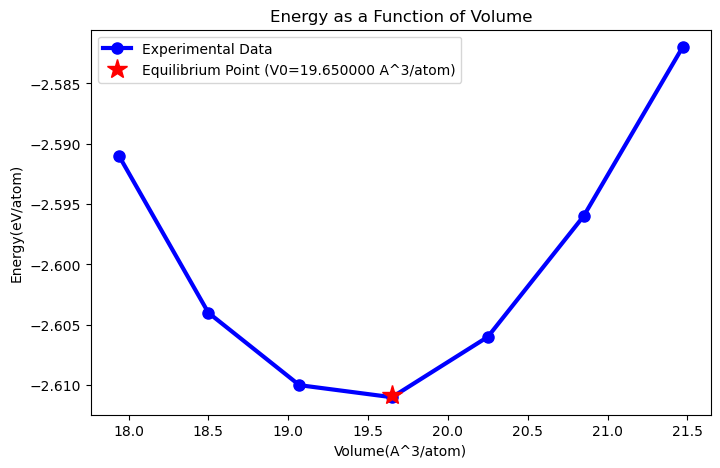

In [118]:
plt.figure(figsize=(8, 5))
plt.plot(V, E, 'bo-', markersize=8, linewidth=3, label='Experimental Data')
E_fitted = energy_volume_equation(V, a, b, c, d)
V0 = V[np.argmin(E_fitted)]
E0 = np.min(E_fitted)
plt.plot(V0, E0, 'r*', markersize=15, label=f'Equilibrium Point (V0={V0:.6f} A^3/atom)')
plt.xlabel('Volume(A^3/atom)')
plt.ylabel('Energy(eV/atom)')
plt.title('Energy as a Function of Volume')
plt.legend();